<a href="https://colab.research.google.com/github/Sokey123456/machine-learning/blob/Sokey123456-patch-1/%E3%83%9B%E3%83%86%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%AET%5E2%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ホテリングの$T^2$法**




## **目的**
 - $T^2$法の概念理解(定義、仮定、性質等)
 - $T^2$法の実装
 - $T^2$法の課題の理解

## **時系列数値データの異常検知に必要な4つの要素技術**
 - 要素技術1. 特徴量空間における距離の定義
 - 要素技術2. 正常データの分布を仮定し，異常なデータと正常なデータを分ける閾値を設定する方法 (本稿)
 - 要素技術3. 複数のモードに対応できるクラスタリング
 - 要素技術4. 時系列データに対応するための移動窓の活用

ホテリングの$T^2$法は，アメリカの経済学者ハロルド・ホテリング が確立した古典的な手法である.
上記のユースケースに必要な4つの要素技術のうち 2. に相当する.

この $2.$ の要素技術をさらに分解すると以下の4つの手順に細分化できる

## **手順**

- 手順1. 母集団の分布を推定する: 統計量として標本の平均値と分散共分散行列を計算する
- 手順2. 異常度を計算する: 標本ごとにマハラノビスの2乗値を計算する
- 手順3. 閾値を計算する: 所望の異常検知確率から異常度の閾値を逆算する
- 手順4. 異常を判定する: 異常度が閾値より大きい場合は異常と判定

## **ホテリングの$T^2$法 定義**

### **訓練データ 定義**
(ラベル無しの訓練データを考える)
$$\mathcal{D} = \{ x^{(n)}\in \mathbb{R}^M: n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.

#### **上記を定義の下では、以下を仮定されている**
**仮定：**$\mathcal{D}$ の中には異常標本が含まれていない、または含まれていたとしても圧倒的少数である

#### **各標本が独立かつ次の確率密度関数に従うと仮定する**
**(多変量正規分布)**\
任意の$x\in\mathbb{R}^M$に対して
$$ f_X(x) = \frac{|\Sigma|^{-1/2}}{(2\pi)^{M/2}}\exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$$
但し、$平均 \mu \in \mathbb{R}^M, 分散共分散行列 \Sigma \in\mathbb{R}^{M \times M}$.




### **マハラノビス距離 定義**

ある集団内の点が多変数ベクトル$(x_1,x_2,\ldots, x_M)^T$で表される時、平均値$(\mu_1,\mu_2,\ldots, \mu_M)$と表し、集団の共分散行列を$\Sigma$とする.\
この時、ある点$(x_1,x_2,\ldots, x_M)^T$から集団へのマハラノビス距離は、以下のように定義される.

$$a(x) = \sqrt{(x-\mu)^T\Sigma^{-1}(x-\mu)} \tag{2.1}$$

(今回、異常度の指標のため、abnormalityの$a$としている)

マハラノビス距離はまた、共分散行列 $\Sigma$ で同じ確率分布に従う2つの確率偏巣ベクトル$\textbf{x},\textbf{y}$の間の隔たりの指標としても定義できる

$$ d(\textbf{x},\textbf{y}) = \sqrt{(\textbf{x}-\textbf{y})^T \Sigma^{-1}(\textbf{x}-\textbf{y})}$$

分散共分散行列が対角行列(互いに独立)であれば、マハラノビス距離は「正規かユークリッド距離」と呼ばれる

$$ d(\textbf{x},\textbf{y}) = \sqrt{\sum_{i=1}^p \frac{(x_i-y_i)^2}{\sigma_i^2}}$$

ここで$\sigma_i$は$x_i$の集合における標準偏差である.
さらに分散共分散行列が単位行列であれば、マハラノビス距離はユークリッド距離と一致する.

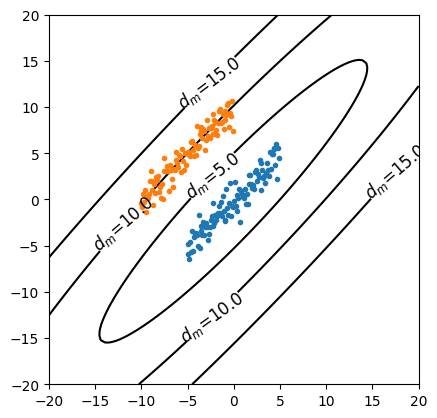

### ホテリングの$T^2$法


$N$ 個の独立標本 $\mathcal{D} = \{ \textbf{x}^{(n)}\in \mathbb{R}^M: n\in \{1,2,\ldots,N\}\}$に対して

標本平均
$$ \hat{\mu} := \frac{1}{N} \sum_{n=1}^N \textbf{x}^{(n)} \tag{2.2}$$

標本分散共分散行列
$$ \hat{\Sigma} := \frac{1}{N} \sum_{n=1}^N (\textbf{x}^{(n)}-\hat{\mu})^T(\textbf{x}^{(n)}-\hat{\mu}) \tag{2.3}$$

$M$ 次元正規分布 $N(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ からの、$N$ 個の独立標本 $\mathcal{D} = \{ \textbf{x}^{(n)}\in \mathbb{R}^M: n\in \{1,2,\ldots,N\}\}$ に基づき、標本平均 $\hat{\boldsymbol{\mu}}$ および、標本分散共分散行列 $\hat{\boldsymbol{\Sigma}}$ を求める。このとき、新たな観測値 $\mathbf{x}'$ について、以下が成立する。

1. $\mathbf{x}'-\hat{\boldsymbol{\mu}}$ は、平均 $0$ で分散共分散行列が $\frac{N+1}{N}\boldsymbol{\Sigma}$ の $M$ 次元正規分布に従う。

2. $\hat{\boldsymbol{\Sigma}}$ は、$\mathbf{x}'-\hat{\boldsymbol{\mu}}$ と統計的に独立である。

3. $T^2 = \frac{N-M}{(N+1)M} \mathbf{a}(\mathbf{x}')$ によって定義される統計量 $T^2$ は、自由度 $(M, N-M)$ の $F$ 分布に従う。

4. $N \gg M$ の場合は、$a(\mathbf{x}')$ は、近似的に自由度 $M$、スケール因子 1 のカイ二乗分布に従う。

ここで、注目すべきは、定理の 4 である。多くの場面において系の変数の次元 $(M)$ は、サンプルの数 $N$ よりかなり小さいと考えられる.
つまり上の定理の 4 が (ほぼ) 常に成立するということになる.
したがって、異常度 $\mathbf{a}$ は、データの物理的単位や数値によらず、自由度 $M$、スケール因子 1 のカイ二乗分布に従うということになる.


書き下すことができるカイ 2 乗分布 (Chi-squared distribution) という分布は、確率密度関数が

$$
\chi^2 (u; k) = \frac{1}{2^{k/2} \Gamma \left( \frac{k}{2} \right)} \left( \frac{u}{2} \right)^{k/2 - 1} \exp \left( - \frac{u}{2} \right) \tag{2.4}
$$

で与えられるので、$k$ がスケール因子、$u$ が自由度です。$\Gamma$ はガンマ関数を表し、次式で定義される

$$
\Gamma (z) = \int_0^\infty dt \, t^{z-1} e^{-t} \tag{2.5}
$$

このカイ 2 乗分布の期待値は $M$、分散は $2M$ です。分散が $M$ に比例するといった点が異常度 $\mathbf{a}$ に注目すべき
相違を異常情報のために使おう、なるべく変数を変換して異常値検知モデルの精度を向上させることができます。事前の特徴量の設計 (feature engineering) が必要
カイ 2 乗分布に基づく異常判定モデルの異常手順をアルゴリズム 2.1 にまとめておく




### **ホテリング$T^2$法のアルゴリズム**


所与の誤報率 $\alpha$ に基づき、カイ 2 乗分布から方程式

$$
1 - \alpha = \int_0^{a_\text{th}} \, \chi^2 (u| M, 1) \, du
$$

により閾値 $a_\text{th}$ を求めておく。

1. 正常標本が圧倒的だと信じられるデータから標本平均 (2.2) および標本共分散行列 (2.3)

$$
\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{x}^{(n)}, \quad \hat{\boldsymbol{\Sigma}} = \frac{1}{N} \sum_{n=1}^{N} \left( \mathbf{x}^{(n)} - \hat{\boldsymbol{\mu}} \right) \left( \mathbf{x}^{(n)} - \hat{\boldsymbol{\mu}} \right)^\top
$$

を計算しておく。

2. 新たな観測値 $\mathbf{x}'$ を得たら、異常度としてのマハラノビス距離 (2.1)

$$
a(\mathbf{x}') = \left( \mathbf{x}' - \hat{\boldsymbol{\mu}} \right)^\top \hat{\boldsymbol{\Sigma}}^{-1} \left( \mathbf{x}' - \hat{\boldsymbol{\mu}} \right)
$$

を計算する。

3. $a(\mathbf{x}') > a_\text{th}$ なら警報を出す。

## ホテリングの$T^2$法　実装

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.spatial import distance
from scipy.stats import chi2



In [ ]:
# 2次元の正規分布からデータセットを作成する
mean = np.array((0,0)) # 平均値をゼロに設定
cov = np.array([(50, 35), (35, 50)]) # 分散共分散行列を設定

# データを10万点作成する
X = np.random.multivariate_normal(mean, cov, 100000)

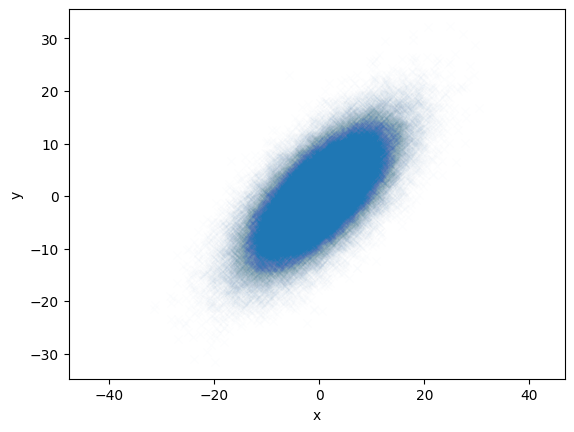

In [ ]:
# データセットの分布を可視化
fig, ax = plt.subplots() #オブジェクトを作成
plt.plot(X.T[0], X.T[1], 'x', alpha=0.01)
ax.set_xlabel('x') #x軸のラベル
ax.set_ylabel('y') #y軸のラベル
plt.axis('equal')
plt.show()

## **アルゴリズム 手順1**
正常標本が圧倒的だと信じられるデータから標本平均 (2.1) および標本共分散行列 (2.2)

$$
\hat{\boldsymbol{\mu}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{x}^{(n)}, \quad \hat{\boldsymbol{\Sigma}} = \frac{1}{N} \sum_{n=1}^{N} \left( \mathbf{x}^{(n)} - \hat{\boldsymbol{\mu}} \right) \left( \mathbf{x}^{(n)} - \hat{\boldsymbol{\mu}} \right)^\top
$$

を計算しておく。


In [ ]:
# 標本の平均を計算
mu = X.mean(axis=0)
# 標本の分散共分散行列を計算
cov2 = np.cov(X.T)

print("母集団の平均")
print(mean)
print("標本平均")
print(mu)

print("\n母集団の分散共分散行列")
print(cov)
print("標本による分散共分散行列")
print(cov2)


母集団の平均
[0 0]
標本平均
[ 0.02551365 -0.00730129]

母集団の分散共分散行列
[[50 35]
 [35 50]]
標本による分散共分散行列
[[49.84107449 34.89949298]
 [34.89949298 49.99386561]]


## **アルゴリズム 手順2**
2. 新たな観測値 $\mathbf{x}'$ を得たら、異常度としてのマハラノビス距離 (2.9)

$$
a(\mathbf{x}') = \left( \mathbf{x}' - \hat{\boldsymbol{\mu}} \right)^\top \hat{\boldsymbol{\Sigma}}^{-1} \left( \mathbf{x}' - \hat{\boldsymbol{\mu}} \right)
$$
を計算する

In [ ]:
# 分散共分散行列の逆行列を計算
cov_i = np.linalg.pinv(cov2)

# 異常度を計算したい点を設定
x = (1, 1)

# 異常度を計算 (マハラノビス距離の2乗値を計算)
anomaly_score = distance.mahalanobis(x, mu, cov_i)**2

# 異常度を表示
print("異常度 = %.5f" % anomaly_score)


異常度 = 0.02318


In [ ]:
# データセット (変数X) に含まれる全データについて異常度を計算
anomaly_scores = np.array([x for x in X if distance.mahalanobis(x, mu, cov_i)**2])

In [ ]:
m = 3    # 自由度 (特徴量の次元) を設定
p = 0.1  # 異常検知される確率を設定
threshold = chi2.isf(p, m)  # 異常検知の閾値を計算

print("自由度 %d で異常検知される確率を %1.2f %%に設定したければ，閾値は %1.2f" % (m, 100 * p, threshold))


自由度 3 で異常検知される確率を 10.00 %に設定したければ，閾値は 6.25


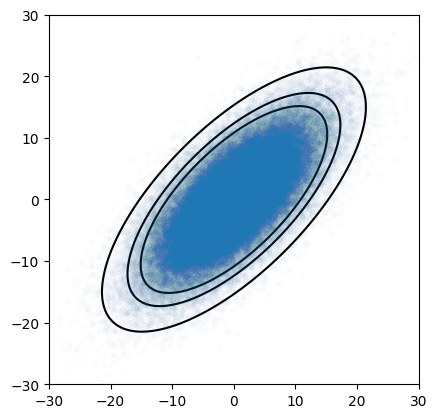

In [ ]:
# 可視化したい「異常検知される確率」の値を設定
probs = [0.1, 0.05, 0.01]

# 確率に対応する等高線の値を計算
levels = [chi2.isf(x, X.shape[-1]) for x in probs]

# 表示範囲の指定
r = 30

# z軸値(異常度)を計算
z = np.array(
    [
        [(i, j, distance.mahalanobis([i,j], mu, cov_i)**2)
         for i in np.linspace(-r, r, 100)]
         for j in np.linspace(-r, r, 100)]
)

# グラフ描画
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.ylim(-r, r)
plt.xlim(-r, r)

# 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=levels, colors=['k'])

# 散布図の描画
plt.plot(X[:,0], X[:,1], '.', alpha=0.01)
plt.show()


## **アルゴリズム 手順3**
3. $a(\mathbf{x}') > a_\text{th}$ なら警報を出す。

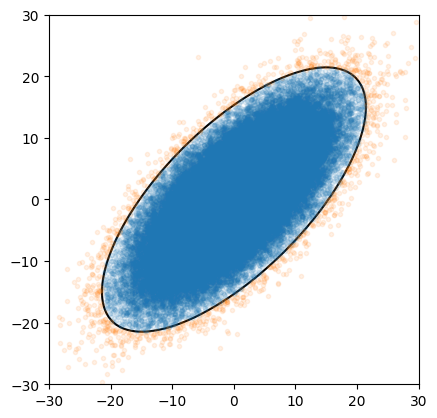

In [ ]:

# 異常検知の実施
##  異常検知される確率を1%に設定
p = 0.01

## 確率に対応する異常度の閾値を計算
threshold = chi2.isf(p, X.shape[-1])

## データセットについて異常検知を実施
anomaly_data = np.array([x for x in X if distance.mahalanobis(x, mu, cov_i)**2 > threshold])

## 可視化用に正常データのみを含むリストも作る
normal_data = np.array([x for x in X if distance.mahalanobis(x, mu, cov_i)**2 <= threshold])

# 散布図として異常検知結果を可視化する
## 表示範囲の指定
r = 30

## z軸値(異常度)を計算
z = np.array(
    [
        [(i, j, distance.mahalanobis([i,j], mu, cov_i)**2)
         for i in np.linspace(-r, r, 100)]
         for j in np.linspace(-r, r, 100)]
)

## グラフ描画
myfig = plt.figure()
myax = myfig.add_subplot(1, 1, 1)
myax.set_aspect('equal')
plt.ylim(-r, r)
plt.xlim(-r, r)

## 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=[threshold], colors=['k'])

## 散布図の描画
plt.plot(normal_data[:,0], normal_data[:,1], '.', alpha=0.1)
plt.plot(anomaly_data[:,0], anomaly_data[:,1], '.', alpha=0.1)
plt.show()


## **異常検知を検算**

最後に，実際に異常検知された確率 (実績値) が閾値設定時の想定 (設定値) と一致するか検算する
この検算が合わない場合は母集団の分布を正しく推定できていないことが示唆され，原因として以下のような可能性を考えることができる

1. 母集団が単一の正規分布に従わない可能性  
   - **対策**: 収集したデータセットの可視化などを行って分布を確認します。そのうえで、前処理の工夫やホテリングの $T^2$ 法以外のアルゴリズムの採用を検討します。

2. 標本平均・標本分散の推定が誤っている可能性  
   - **対策**: データ収集を継続してデータセットの標本数を増やします。

3. 診断対象のデータ数が少なすぎる可能性  
   - **対策**: 診断対象のデータ数を増やして再度検算を行います。


In [ ]:
print("異常検知された標本数: %10d個" % len(anomaly_data))
print("異常検知確率 (設定値): %10.2f%%" % (p * 100))
print("異常検知確率 (実績値): %10.2f%%" % (len(anomaly_data)/len(X) * 100))

異常検知された標本数:       1007個
異常検知確率 (設定値):       1.00%
異常検知確率 (実績値):       1.01%


## **参考文献**
- 異常検知と変動検知 chapter 2
- https://qiita.com/MasafumiTsuyuki/items/de19d8ec274e961ec946
- https://qiita.com/MasafumiTsuyuki/items/2677576849abf633e412


# **Appendix**

## **上記の資料のグラフ**

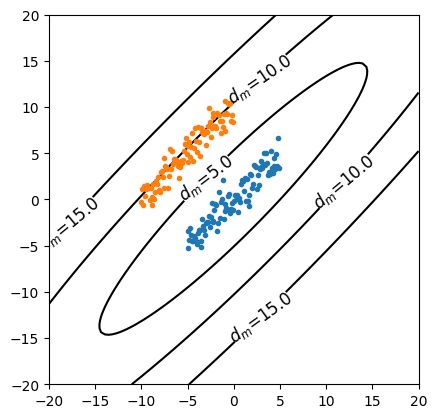

In [ ]:
import numpy as np
from scipy.spatial import distance
X1 = np.array([(x, x + np.random.normal()) for x in np.arange(-5, 5, 0.1)])
X2 = np.array([(x, 10 + x + np.random.normal()) for x in np.arange(-10, 0, 0.1)])

import matplotlib.pyplot as plt

# 青色のデータ群の中心 (標本平均) を計算
mean = X1[:,0].mean(), X1[:,1].mean()

# 分散共分散行列を計算
cov = np.cov(X1.T)

# z軸値 (標本平均からのマハラノビス距離) を計算
z = np.array(
    [[(i, j, distance.mahalanobis([i,j], mean, np.linalg.pinv(cov)))
         for i in np.linspace(-20, 20, 100)]
         for j in np.linspace(-20, 20, 100)]
)

# グラフ描画
myfig = plt.figure()
myax = myfig.add_subplot(1, 1, 1)
myax.set_aspect('equal')
plt.ylim(-20, 20)
plt.xlim(-20, 20)

# 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=[5,10,15], colors=['k'])
cont.clabel(fmt='$d_m$=%1.1f', fontsize=12)


# 散布図の描画
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')

plt.show()

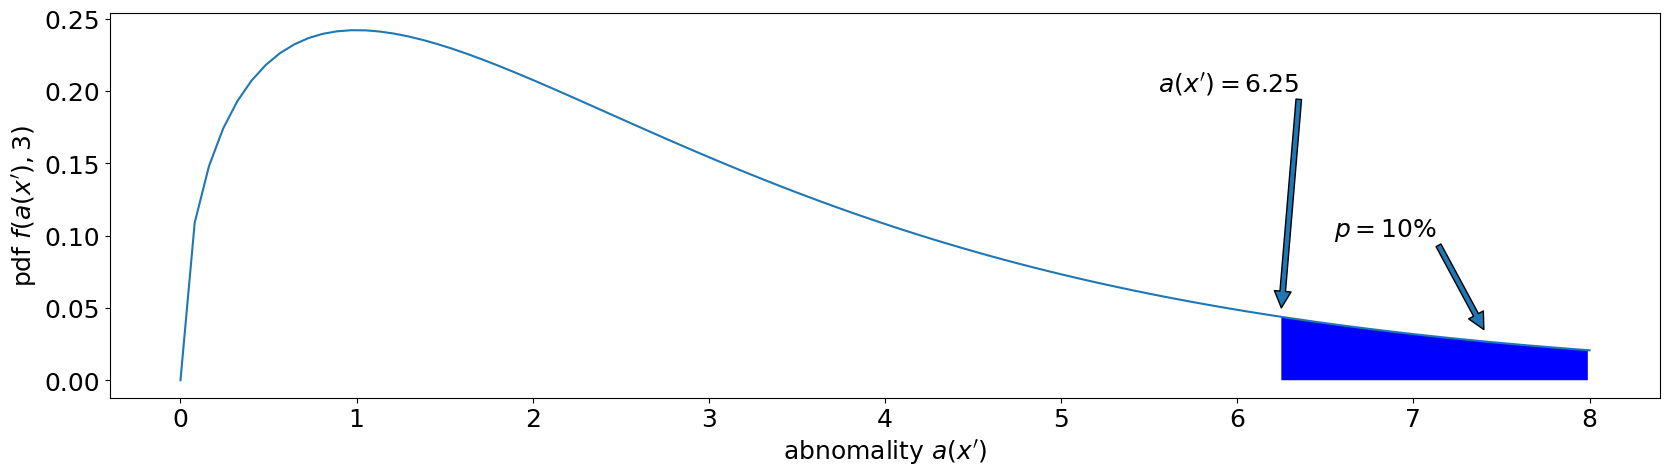

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import chi2
import numpy as np

# 自由度
m = 3

plt.rcParams["font.size"] = 18
plt.figure(figsize=(20,5))

# カイ二乗分布の確率密度関数を可視化
chi_pdf = np.array([(x, chi2.pdf(x, m)) for x in np.linspace(0, 8, 100)])
plt.plot(chi_pdf[:,0], chi_pdf[:,1])

x1 = np.arange(6.25, 8, 0.01)
y1 = chi2.pdf(x1, m)
y2 = np.zeros(x1.shape)
plt.fill_between(x1, y1, y2, where=y1>y2, facecolor='blue')
plt.annotate("$a(x')=6.25$",
             xy=(6.25, 0.05), xytext=(5.55, 0.20), arrowprops=dict())
plt.annotate("$p=10\%$",
             xy=(7.4, 0.035), xytext=(6.55, 0.1), arrowprops=dict())
plt.xlabel("abnomality $a(x')$")
plt.ylabel("pdf $f(a(x'), %d)$" % m)

plt.show()


## **実験**
- 正規分布でない分布に対してどのような挙動を示すか?
    - ポアソン分布
    - 指数分布
    - 対数正規分布
    - スチューデントのt分布

ここは未検証のため、実験出来次第、逐次記入していく